In [26]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

In [27]:
env = Maze()

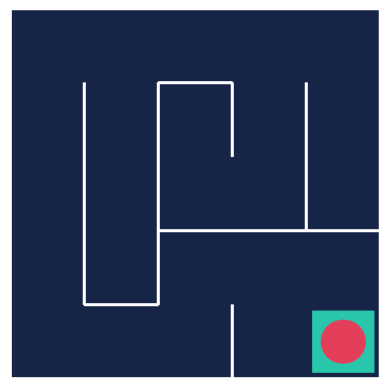

In [28]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [29]:
print(env.observation_space.nvec)
print(env.action_space.n)

[5 5]
4


In [30]:
#create the policy
policy_probs = np.full((5,5,4),0.25) # 25 states with 4 possible actions
print(policy_probs)

[[[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]

 [[0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]
  [0.25 0.25 0.25 0.25]]]


In [31]:
def policy(state):
    return policy_probs[state]

In [32]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"probability of taking action {action}:{prob}")

probability of taking action 0:0.25
probability of taking action 1:0.25
probability of taking action 2:0.25
probability of taking action 3:0.25


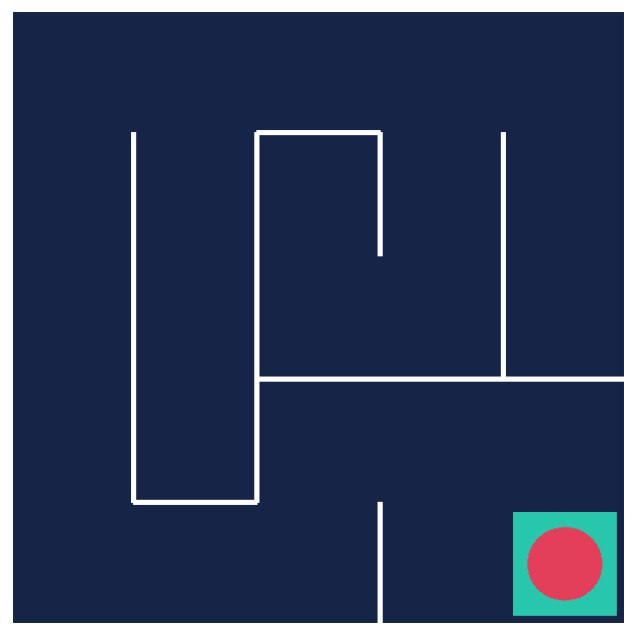

In [33]:
test_agent(env, policy, episodes=1)

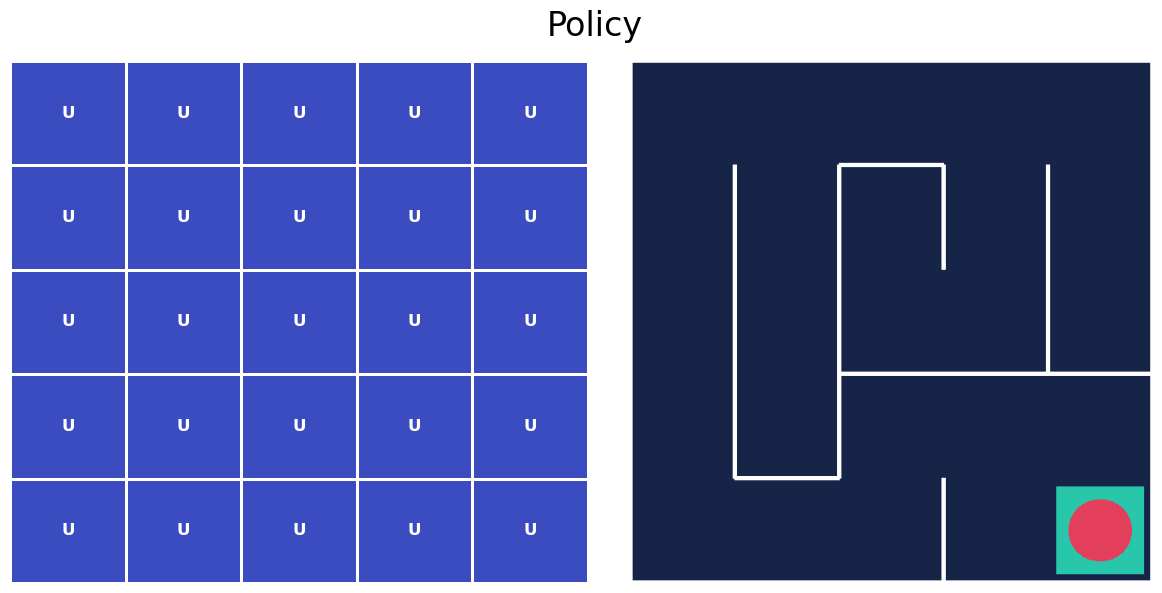

In [ ]:
plot_policy(policy_probs, frame)

In [35]:
state_values = np.zeros(shape=(5,5))

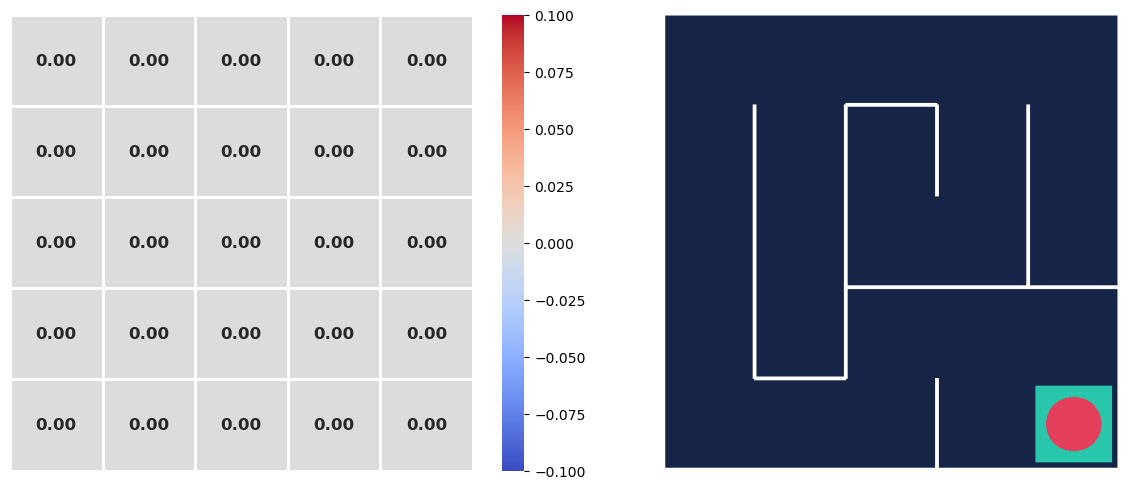

In [36]:
plot_values(state_values,frame)

In [1]:
def value_iteration(policy_probs, state_values, theta = 1e-6, gamma=0.99):
    delta = float("inf")
    print(theta)

    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float("-inf")

                for action in range(4):
                    next_state, reward, _, _=env.simulate_step((row, col), action)
                    qsa = reward + gamma *state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa =qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1
                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs
                print(policy_probs)

                delta = max(delta, abs(max_qsa-old_value))



In [51]:
value_iteration(policy_probs, state_values)

1e-06
[[[0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]

 [[0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]]
[[[0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]

 [[0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]]]
[[[0. 0. 1. 0.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [1. 0. 0. 0.]
  [1. 0. 0. 0.]]

 [[0. 0. 1

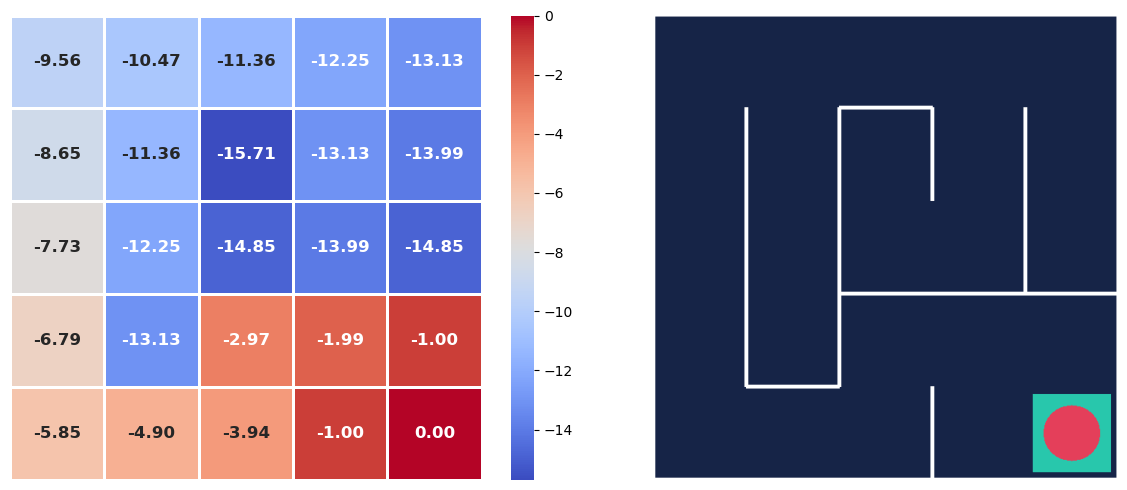

In [39]:
plot_values(state_values, frame)

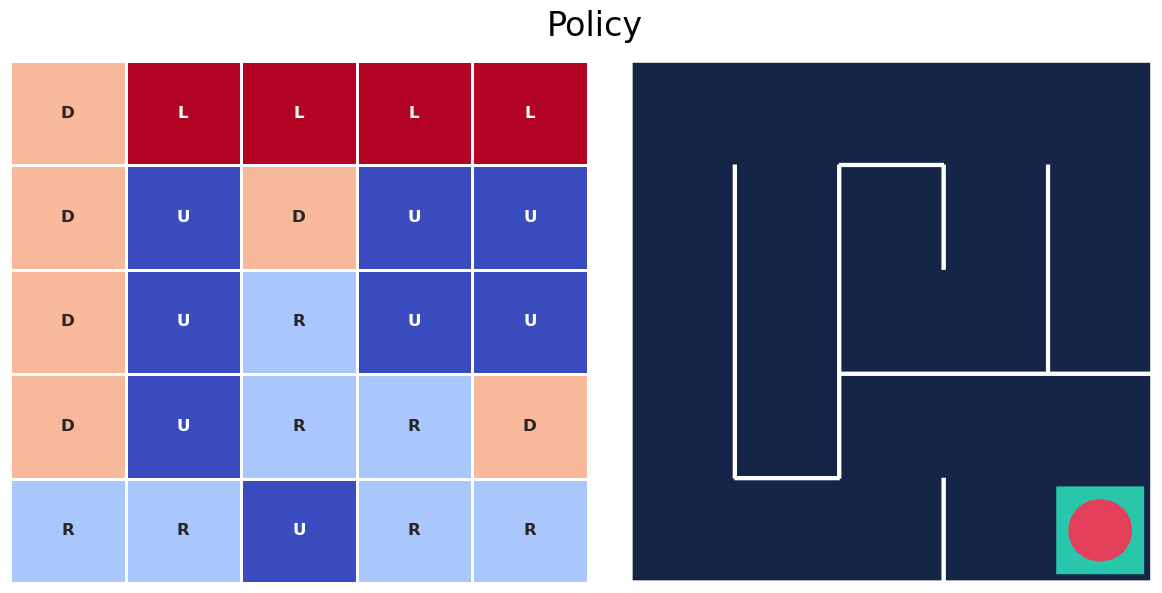

In [40]:
plot_policy(policy_probs, frame)